In [181]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from skimage.io import imread, imshow

In [182]:
#directory path where images are located
#image_dir ="C:/Users/DELL/Desktop/Training/pituitary/Tr-pi_0134.jpg"
#image_dir="C:/Users/DELL/Desktop/sample image.png"
image_dir="C:/Users/DELL/Desktop/Training/meningioma/Tr-me_0031.jpg"
#image_dir="C:/Users/DELL/Desktop/Training/notumor/Tr-no_0018.jpg"


In [183]:
def ShowImage(title,img,ctype):
    plt.figure(figsize=(10, 10))
    if ctype=='bgr':
        b,g,r = cv2.split(img)       # get b,g,r
        rgb_img = cv2.merge([r,g,b])     # switch it to rgb
        plt.imshow(rgb_img)
    elif ctype=='hsv':
        rgb = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
        plt.imshow(rgb)
    elif ctype=='gray':
         plt.imshow(img,cmap='gray')
    elif ctype=='rgb':
         plt.imshow(img)
    else:
        raise Exception("Unknown colour type")
    plt.axis('off')
    plt.title(title)
    plt.show()

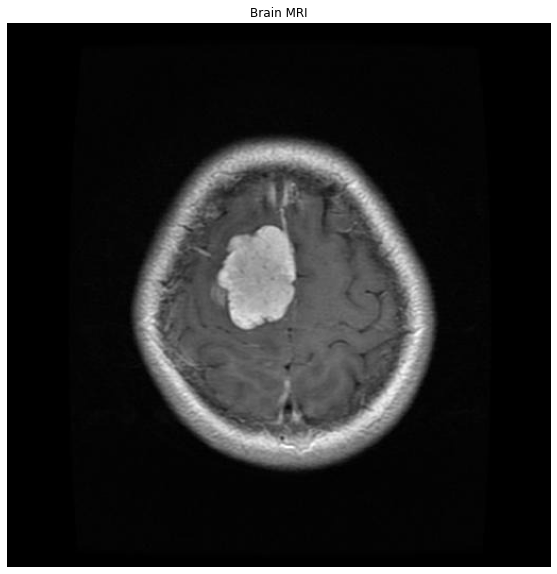

In [184]:
img = cv2.imread(image_dir)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ShowImage('Brain MRI',gray_image,'gray')

In [185]:
# Apply thresholding with a fixed threshold value
threshold_value = 100  # Change the threshold value as desired
ret, thresh = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)

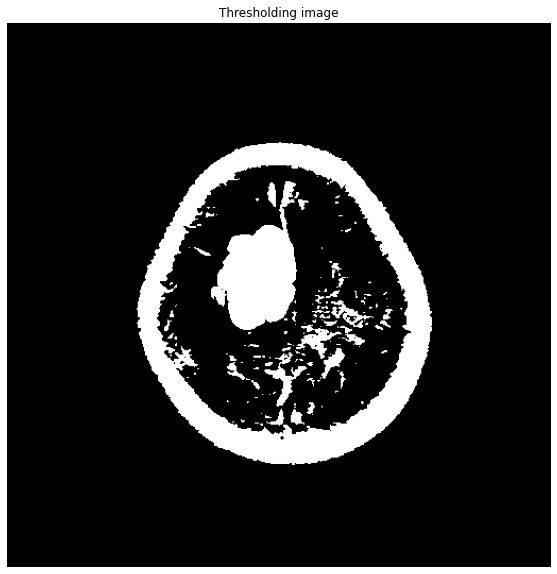

In [186]:
ShowImage('Thresholding image',thresh,'gray')

In [187]:
ret, markers = cv2.connectedComponents(thresh)

In [188]:
#Get the area taken by each component. Ignore label 0 since this is the background.
marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 

In [189]:
#Get label of largest component by area
largest_component = np.argmax(marker_area)+1 #Add 1 since we dropped zero above  

In [190]:
#Get pixels which correspond to the brain
brain_mask = markers==largest_component

In [191]:
brain_out = img.copy()

In [192]:
#In a copy of the original image, clear those pixels that don't correspond to the brain
brain_out[brain_mask==False] = (0,0,0)

In [193]:
img = cv2.imread(image_dir)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,150,255,cv2.THRESH_BINARY)

In [194]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

In [195]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

In [196]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

In [197]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [198]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

In [199]:
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1


In [200]:
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

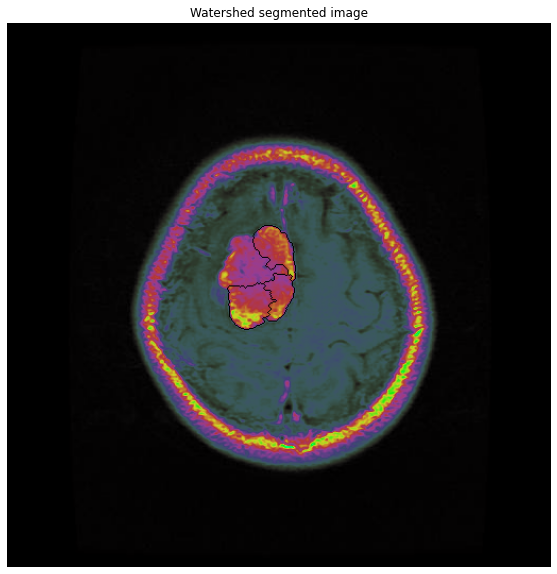

In [201]:
im1 = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
ShowImage('Watershed segmented image',im1,'gray')

In [202]:
import numpy as np

# Reshape im1 to a 1D array
#for pixel in im1.reshape(-1):
    #print(pixel)

# Apply thresholding
threshold_value = 170
im1[im1 < threshold_value] = 0


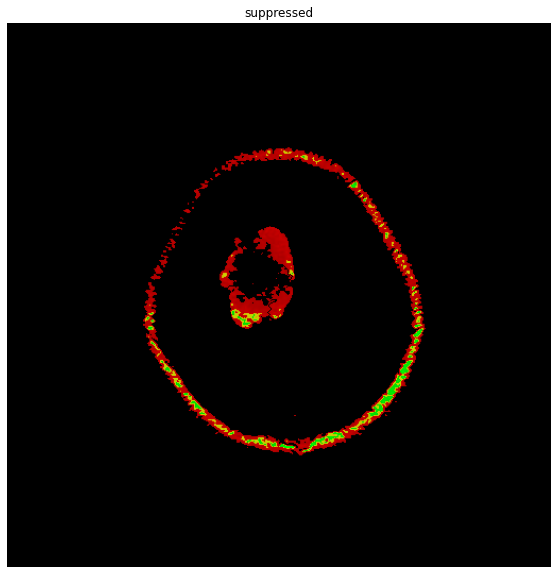

In [203]:
ShowImage('suppressed', im1, 'gray')

#import numpy as np
#for i in im1.reshape(-1):
    
  
#print(i)


import cv2
import numpy as np

brain_mask = np.uint8(brain_mask)
kernel = np.ones((8, 8), np.uint8)


# Perform closing operation
closing = cv2.morphologyEx(brain_mask, cv2.MORPH_CLOSE, kernel)

# Perform opening operation
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)

# Display the opening result using OpenCV
ShowImage('Closing', opening,'gray')

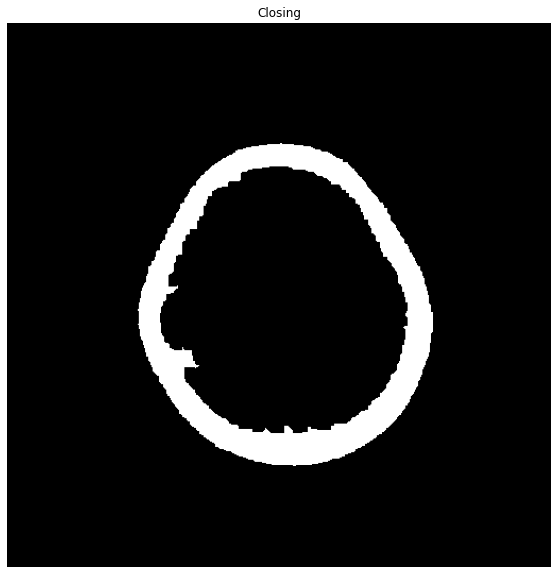

In [204]:
brain_mask = np.uint8(brain_mask)
kernel = np.ones((8,8),np.uint8)
closing = cv2.morphologyEx(brain_mask, cv2.MORPH_CLOSE, kernel)
ShowImage('Closing', closing, 'gray')

In [205]:
brain_out = img.copy()
#In a copy of the original image, clear those pixels that don't correspond to the brain
brain_out[closing==False] = (0,0,0)

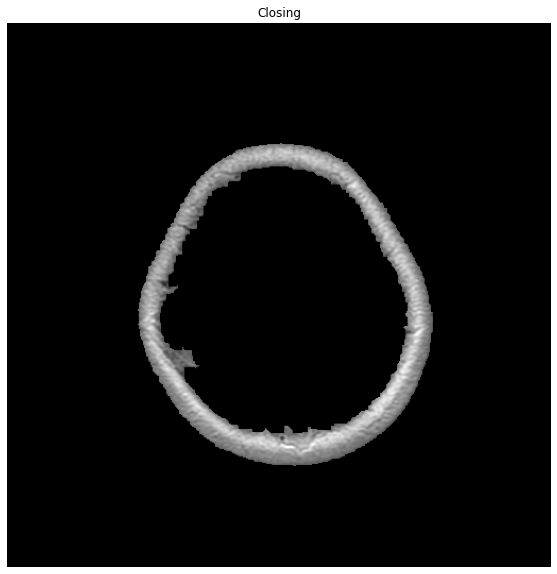

In [206]:
ShowImage('Closing', brain_out, 'gray')